In [1]:
import numpy as np
import os
import nrrd
import matplotlib.pyplot as plt
import json
import my_csvTools

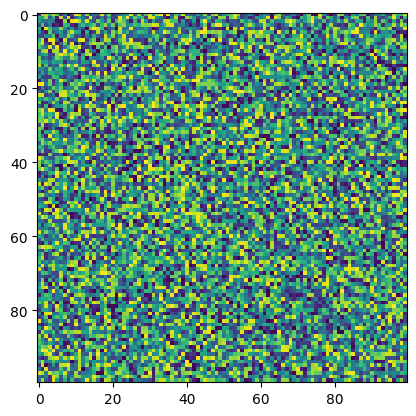

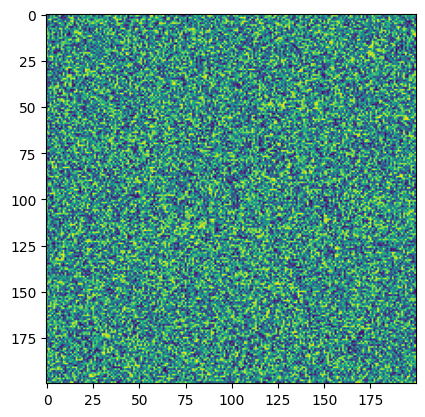

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 读取第一张图片
img1 =  np.random.rand(100, 100)

# 创建一个新的画布
fig = plt.figure()

# 在画布上显示第一张图片
plt.imshow(img1)

# 显示第一张图片
plt.show()

# 读取第二张图片
img2 =  np.random.rand(200, 200)

# 清除之前的图像
plt.clf()

# 在同一个画布上显示第二张图片
plt.imshow(img2)

# 显示第二张图片
plt.show()

In [9]:
data_dir = r"C:\Users\BB\Desktop\training_data\My_SAnet\Data\Dicom_crop"
GT_dir = r"C:\Users\BB\Desktop\training_data\My_SAnet\Data\Bbox_crop_anno"
Pred_dir = r"C:\Users\BB\Desktop\training_data\first_result\res\FROC"

# filename = 
pid = 'CHEST1100'
# gt_list = 
# pred_list = 
# outpath = 

In [10]:
# Load img
def lumTrans(data_dir, pid):
        img = np.load(os.path.join(data_dir, '%s_crop.npy' % (pid)))
        newimg = (img - -1200) / (600  - -1200)
        newimg[newimg < 0] = 0
        newimg[newimg > 1] = 1
        newimg = (newimg * 255).astype('uint8')
        return newimg

img = lumTrans(data_dir, pid)

# draw box
input : box info list (gt, FP, FN, TP)
output: finished img



## Read box info
1. Read GT
2. Read FN
3. Read Prediction
Read info may need different function
But, draw box should be defined as a gerenal one

In [11]:
# # Read GT from json
# with open(os.path.join(GT_dir, '%s_nodule_count_crop.json' % (filename)), 'r') as f:
#                 annota= json.load(f)
#                 bboxes = annota['bboxes']


In [12]:
# Read Pred from csv: submission_path.csv
# read rcnn result for example
pred_file = os.path.join(Pred_dir, 'submission_rpn.csv')
title = my_csvTools.get_csv_titles(pred_file)
print(title)
pred_list = my_csvTools.read_csv_per_patient(pred_file,pid)
print(pred_list)


['seriesuid', 'coordX', 'coordY', 'coordZ', 'w', 'h', 'd', 'probability']
[['113.245094', '110.64066', '162.86275', '7.9056387', '7.684727', '5.9777193', '0.9999348'], ['360.8275', '130.5558', '178.75809', '10.438496', '10.268363', '7.66004', '0.9996686'], ['297.35123', '145.99951', '32.648144', '14.731983', '13.666529', '7.9088535', '0.99956447'], ['335.1355', '93.82557', '70.00465', '10.252618', '9.913383', '7.4209223', '0.9989808'], ['84.45022', '178.0776', '78.55299', '7.8402896', '7.5106554', '5.6582017', '0.998406'], ['100.50577', '214.23126', '128.46204', '8.494305', '8.067371', '5.7996235', '0.9975073'], ['78.53901', '26.4378', '168.97205', '14.496184', '13.693116', '7.745068', '0.996938'], ['313.71933', '149.24918', '36.82891', '14.369395', '13.468377', '7.458122', '0.99560356'], ['294.39514', '102.49054', '58.45105', '7.8163376', '7.428485', '5.6267886', '0.99554634'], ['334.18823', '17.50206', '170.04242', '15.064214', '14.084039', '7.8893385', '0.9955342'], ['120.88776', '9

In [13]:
def draw_boxes(box_list=[], slice_id=0,mode='pred'):
    """
    box_list: list of boxes, each box is a list of ['coordX', 'coordY', 'coordZ', 'w', 'h', 'd', 'probability']
    """
    if box_list is None:
        return
    txt_color = '#000000'
    edge_color = '#FF0000'
    if mode == 'pred': edge_color = '#FF0000'
    elif mode == 'gt': edge_color = '#00FF00'
    else: edge_color = '#0000FF'
    # draw predict box
    for box in box_list:
        box = [my_csvTools.tryFloat(num) for num in box] 
        if box[-1]< 0.8:
            continue                              
        start_slice = box[2] - box[5] / 2
        end_slice = box[2] + box[5] / 2
        # if the slice is in the range of the box , then draw the box
        if start_slice <= slice_id <= end_slice:
            rect = plt.Rectangle(
                (box[0] - box[3] / 2, box[1] - box[4] / 2),
                box[3], box[4],
                fill=False,
                edgecolor=edge_color,
                linewidth=1
            )
            plt.gca().add_patch(rect)
            if mode == 'pred':
                plt.text(
                    box[0] - box[3] / 2, box[1] - box[4] / 2,
                    round(box[6], 2),
                    color=txt_color,
                    bbox={'edgecolor': edge_color, 'facecolor': edge_color, 'alpha': 0.5, 'pad': 0}
                )

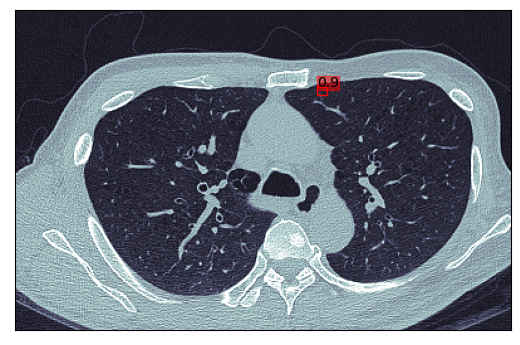

In [15]:
def draw_image(img, slice_id,pred_list=None, gt_list=None,fn_list=None):
    """
    box_list: list of boxes, each box is a list of ['coordX', 'coordY', 'coordZ', 'w', 'h', 'd', 'probability']
    """

    # get and show the slice img
    slice_img = img[:,:,slice_id]
    plt.figure()
    plt.xticks([])
    plt.yticks([])
    plt.box('off')
    plt.imshow(slice_img, cmap="bone")

    # draw predict box
    draw_boxes(pred_list, slice_id,mode='pred')
    draw_boxes(gt_list, slice_id,mode='gt')
    draw_boxes(fn_list, slice_id,mode='fn')
    
draw_image(img, 110,pred_list)